<a href="https://colab.research.google.com/github/jweir136/AAPL_Machine_Learning_1/blob/master/AAPL_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

np.random.seed(42)

data = pd.read_csv("AAPL.csv").drop(['Close'], axis=1)
data.set_index('Date', drop=True, inplace=True)

This is a machine learning algo, used to predict the adjusted closing price of AAPL (Apple Inc.) 10 *trading days* in the future.


In [4]:
data.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2013-12-30,79.637146,80.012856,78.902855,67.420517,63407400
2013-12-31,79.167145,80.182854,79.142860,68.210831,55771100
2014-01-02,79.382858,79.575714,78.860001,67.251503,58671200
2014-01-03,78.980003,79.099998,77.204285,65.774300,98116900
2014-01-06,76.778572,78.114288,76.228569,66.132957,103152700


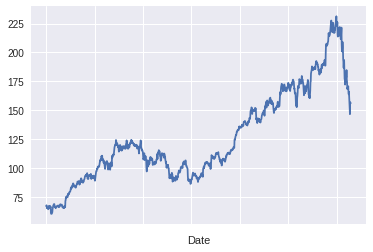

In [5]:
data['Adj Close'].plot()

In [0]:
X = data['Adj Close'].shift(10).dropna()
y = data['Adj Close']

trainX, testX, trainY, testY = train_test_split(X.values, y[10:].values, test_size=.2)

trainX, trainY, testX, testY = trainX.reshape(-1, 1), trainY.reshape(-1, 1), testX.reshape(-1, 1), testY.reshape(-1, 1)

Now that we have looked at the data, and split it into training and testing datasets, we can create our model.

In [0]:
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

To create our model, we are just going to use a standard scaler, and Linear Regression.  Now we can use cross-validation to test our model.

In [0]:
kfold = KFold(n_splits=10)
lr_score = cross_val_score(lr, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error')

In [9]:
lr_score.mean()

-41.10067297216677

This means that on average, the model will be $2.06 off of the actual price.

In [0]:
lr.fit(trainX, trainY)

preds = lr.predict(testX)

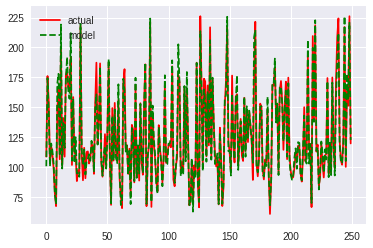

In [11]:
plt.plot([a for a in range(len(testY))], testY, 'r-', label='actual')
plt.plot([a for a in range(len(preds))], preds, 'g--', label='model')
plt.legend()
plt.show()

In [12]:
lr.predict([[165.48]])

array([[165.61490198]])

Now that we are sure that our model is working fine, we can backtest our model.  Since we trained our model on data from 2013 to 2018, we are going to backtest using data from 2009 to 2013.

In [0]:
backtest = pd.read_csv("AAPL_Backtest.csv")

In [0]:
errors = []
counter = 0
pred = None

for price in backtest['Adj Close'].values[::10]:
  if counter == 0:
    pred = lr.predict([[price]])
  else:
    errors.append(pred - price)
    pred = lr.predict([[price]])
  counter += 1

Not lets find the average dollar amount that our model was off by.

In [15]:
sum(errors) / len(errors)

array([[1.67843893]])